In [1]:
import pandas as pd

# Get Enformer predictions

In [2]:
enformer_ids = pd.read_csv("/mnt/lab_data2/anusri/chrombpnet/results/variant_data/dsqtls/process/fetch_enformer/enformer_predictions.tsv", sep="\t", header=0)

In [3]:
enformer_ids.head()

,chr,pos,ref,alt,rsid,DNASE_SAD,DNASE_SAR
0,chr1,842250,A,G,rs148658266,-0.000669,-0.000892
1,chr1,845938,G,A,rs57760052,0.000002,0.000002
2,chr1,846489,C,T,rs4970333,-0.000063,-0.000083
3,chr1,847041,C,T,rs59518089,0.000012,0.000016
4,chr1,849441,A,G,rs28495095,-0.000006,-0.000008


# Get GKM SVM predictions

In [4]:
gkm_svm = pd.read_csv("/mnt/lab_data3/anusri/histone_expts/all_qtl_analysis/gm12878_sequence_sets/test_set/deltasv,/41588_2015_BFng3331_MOESM26_ESM.csv",header=0,sep=',')

In [5]:
gkm_svm.head()

,chrom_hg18,pos_hg18,SNPname1,chrom_hg19,pos_hg19,SNPname2,allele1,allele2,gkm_SVM,kmer_SVM,abs_gkm_SVM,abs_kmer_SVM,CADD,GWAVA_region,GWAVA_tss,GWAVA_unmatched,GERP,label
0,chr1,846446,chr1.846446,chr1,856583,rs141671872,A,G,2.653531,7.938784,2.653531,7.938784,-1.522533,0.48,0.53,0.75,-0.682,1
1,chr1,901458,chr1.901458,chr1,911595,rs7417106,G,A,2.821422,6.027648,2.821422,6.027648,1.739152,0.29,0.36,0.89,2.150,1
2,chr1,1176365,chr1.1176365,chr1,1186502,rs6603785,T,A,-7.167236,-10.870018,7.167236,10.870018,-0.091378,0.42,0.49,0.66,0.451,1
3,chr1,1217275,chr1.1217275,chr1,1227412,rs112571439,A,G,-3.957382,2.387491,3.957382,2.387491,1.127472,0.34,0.43,0.49,2.430,1
4,chr1,1580438,chr1.1580438,chr1,1590575,rs9661285,A,G,-4.785596,-6.827102,4.785596,6.827102,0.665464,0.38,0.35,0.86,1.640,1


In [6]:
gkm_svm['rsid'] = gkm_svm["chrom_hg19"].astype(str) + "_" + gkm_svm["pos_hg19"].astype(str) + "_" + gkm_svm["allele1"].astype(str) + "_" + gkm_svm["allele2"].astype(str)  


# Consider variants that are only present in enformer

In [7]:
# ref and alt can be allel1 and allel2 so find both combinations for rsid, merge them and then make sure you are not double counting rsids
merged_enf_1 = enformer_ids.merge(gkm_svm, left_on=["rsid", "chr", "pos", "ref", "alt"], right_on=["SNPname2", "chrom_hg19", "pos_hg19", "allele2", "allele1"])
merged_enf_2 = enformer_ids.merge(gkm_svm, left_on=["rsid", "chr", "pos", "ref", "alt"], right_on=["SNPname2", "chrom_hg19", "pos_hg19", "allele1", "allele2"])

In [8]:
merged_enf = pd.concat([merged_enf_1, merged_enf_2]).drop_duplicates()

In [9]:
merged_enf.shape

(27373, 26)

In [10]:
merged_enf["rsid_x"].unique().shape

(27373,)

In [11]:
merged_enf.head()

,chr,pos,ref,alt,rsid_x,DNASE_SAD,DNASE_SAR,chrom_hg18,pos_hg18,SNPname1,...,kmer_SVM,abs_gkm_SVM,abs_kmer_SVM,CADD,GWAVA_region,GWAVA_tss,GWAVA_unmatched,GERP,label,rsid_y
0,chr1,842250,A,G,rs148658266,-0.000669,-0.000892,chr1,832113,chr1.832113,...,-3.520730,3.626510,3.520730,-0.068203,0.47,0.53,0.55,-2.120,-1,chr1_842250_G_A
1,chr1,846489,C,T,rs4970333,-0.000063,-0.000083,chr1,836352,chr1.836352,...,0.223815,4.107834,0.223815,0.688572,0.41,0.45,0.80,1.530,-1,chr1_846489_T_C
2,chr1,847041,C,T,rs59518089,0.000012,0.000016,chr1,836904,chr1.836904,...,-1.835191,0.916666,1.835191,-0.293843,0.21,0.33,0.63,0.328,-1,chr1_847041_T_C
3,chr1,849441,A,G,rs28495095,-0.000006,-0.000008,chr1,839304,chr1.839304,...,10.615775,4.518678,10.615775,0.010495,0.48,0.49,0.84,-0.690,-1,chr1_849441_G_A
4,chr1,852964,G,T,rs4970461,0.000045,0.000060,chr1,842827,chr1.842827,...,-3.596284,1.904426,3.596284,0.438963,0.33,0.45,0.69,3.940,-1,chr1_852964_T_G


In [12]:
sum(merged_enf["label"]==1)

560

In [13]:
merged_enf.shape

(27373, 26)

In [14]:
rsid_samples = merged_enf["rsid_x"].unique()

In [15]:
gkm_svm["SNPname2"].unique().shape

(28309,)

In [16]:
sum(gkm_svm["label"]==1)

574

In [17]:
gkm_svm.columns

Index(['chrom_hg18', 'pos_hg18', 'SNPname1', 'chrom_hg19', 'pos_hg19',
       'SNPname2', 'allele1', 'allele2', 'gkm_SVM', 'kmer_SVM', 'abs_gkm_SVM',
       'abs_kmer_SVM', 'CADD', 'GWAVA_region', 'GWAVA_tss', 'GWAVA_unmatched',
       'GERP', 'label', 'rsid'],
      dtype='object')

In [18]:

gkm_svm = gkm_svm[gkm_svm["SNPname2"].isin(rsid_samples)]

In [19]:
gkm_svm.shape

(27373, 19)

# Get ChromBPNet predictions, consider only rsids given by enformer and dsqtls

In [20]:
chrombpnet_atac_orig = pd.read_csv("/mnt/lab_data2/anusri/variant-scorer/src/output/dsqtls_lcl/ATAC/summary.mean.variant_scores_new.tsv", sep="\t", header=0)
chrombpnet_atac = pd.read_csv("/mnt/lab_data2/anusri/variant-scorer/src/output/dsqtls_lcl/ATAC_50M/summary.mean.variant_scores_new.tsv", sep="\t", header=0)
chrombpnet_dnase = pd.read_csv("/mnt/lab_data2/anusri/variant-scorer/src/output/dsqtls_lcl/DNASE/summary.mean.variant_scores_new.tsv", sep="\t", header=0)

In [21]:
gkm_svm.shape

(27373, 19)

In [22]:
chrombpnet_atac.shape

(28309, 23)

In [23]:
chrombpnet_dnase.shape

(28309, 23)

In [24]:
merged_atac = chrombpnet_atac.merge(gkm_svm, on='rsid')
merged_atac_orig = chrombpnet_atac_orig.merge(gkm_svm, on='rsid')
merged_dnase = chrombpnet_dnase.merge(gkm_svm, on='rsid')

In [25]:
merged_atac.shape

(27373, 41)

In [26]:
merged_dnase.shape

(27373, 41)

In [27]:
merged_dnase.columns

Index(['chr', 'pos', 'allele1_x', 'allele2_x', 'rsid', 'logfc.mean',
       'abs_logfc.mean', 'abs_logfc.mean.pval', 'jsd.mean', 'jsd.mean.pval',
       'logfc_x_jsd.mean', 'abs_logfc_x_jsd.mean', 'abs_logfc_x_jsd.mean.pval',
       'max_percentile.mean', 'max_percentile.mean.pval',
       'logfc_x_max_percentile.mean', 'abs_logfc_x_max_percentile.mean',
       'abs_logfc_x_max_percentile.mean.pval', 'jsd_x_max_percentile.mean',
       'jsd_x_max_percentile.mean.pval',
       'abs_logfc_x_jsd_x_max_percentile.mean',
       'abs_logfc_x_jsd_x_max_percentile.mean.pval',
       'logfc_x_jsd_x_max_percentile.mean', 'chrom_hg18', 'pos_hg18',
       'SNPname1', 'chrom_hg19', 'pos_hg19', 'SNPname2', 'allele1_y',
       'allele2_y', 'gkm_SVM', 'kmer_SVM', 'abs_gkm_SVM', 'abs_kmer_SVM',
       'CADD', 'GWAVA_region', 'GWAVA_tss', 'GWAVA_unmatched', 'GERP',
       'label'],
      dtype='object')

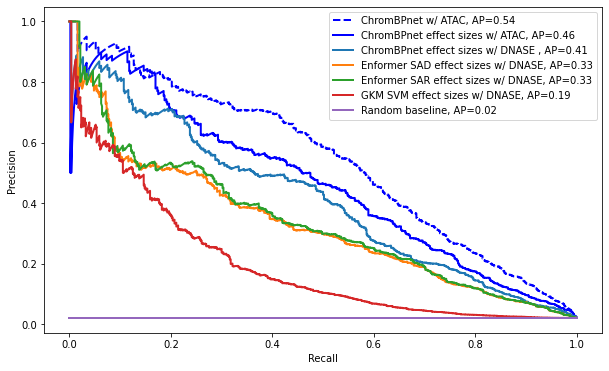

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import random
import os
import argparse
from sklearn.metrics import precision_recall_curve

scores = []
labels = []
keys = []

keyd="abs_logfc_x_jsd_x_max_percentile.mean"
key_short="CRS"
plt.figure(figsize=(10,6))


fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(merged_atac_orig["label"].astype(int), abs(merged_atac_orig[keyd]))
roc_auc = metrics.average_precision_score(merged_atac_orig["label"], abs(merged_atac_orig[keyd]))
plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', linestyle='dashed', label="ChromBPnet w/ ATAC, AP="+str(round(roc_auc,2)))

scores.append(roc_auc)
labels.append("ATAC (572M)")
keys.append(key_short)

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(merged_atac["label"], abs(merged_atac[keyd]))
roc_auc = metrics.average_precision_score(merged_atac["label"], abs(merged_atac[keyd]))
plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', label="ChromBPnet effect sizes w/ ATAC, AP="+str(round(roc_auc,2)))

scores.append(roc_auc)
labels.append("ATAC (50M)")
keys.append(key_short)

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(merged_dnase["label"], abs(merged_dnase[keyd]))
roc_auc = metrics.average_precision_score(merged_dnase["label"], abs(merged_dnase[keyd]))
plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label="ChromBPnet effect sizes w/ DNASE , AP="+str(round(roc_auc,2)))

scores.append(roc_auc)
labels.append("DNASE (68M)")
keys.append(key_short)


fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(merged_enf["label"], abs(merged_enf['DNASE_SAD'].astype(float)))
roc_auc = metrics.average_precision_score(merged_enf["label"], abs(merged_enf['DNASE_SAD'].astype(float)))
plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label="Enformer SAD effect sizes w/ DNASE, AP="+str(round(roc_auc,2)))

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(merged_enf["label"], abs(merged_enf['DNASE_SAR'].astype(float)))
roc_auc = metrics.average_precision_score(merged_enf["label"], abs(merged_enf['DNASE_SAR'].astype(float)))
plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label="Enformer SAR effect sizes w/ DNASE, AP="+str(round(roc_auc,2)))


fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(merged_atac["label"], abs(merged_atac['abs_gkm_SVM'].astype(float)))
roc_auc = metrics.average_precision_score(merged_atac["label"], abs(merged_atac['abs_gkm_SVM'].astype(float)))
plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label="GKM SVM effect sizes w/ DNASE, AP="+str(round(roc_auc,2)))



in1 = list(merged_atac["label"])
random.shuffle(in1)
in1=np.array(in1)

fpr_random, tpr_random, _ = precision_recall_curve(merged_atac["label"], in1)
roc_auc = metrics.average_precision_score(merged_atac["label"], in1)
plt.plot(tpr_random, [sum(merged_atac["label"]==1)/len(merged_atac["label"])]*len(fpr_random), linewidth=2, label="Random baseline, AP="+str(round(roc_auc,2)))


plt.legend(loc='upper right')
plt.xlabel("Recall")
plt.ylabel("Precision")

plt.savefig("subfigs_new/dsqtls_final.pdf", transparent=True, dpi=300)

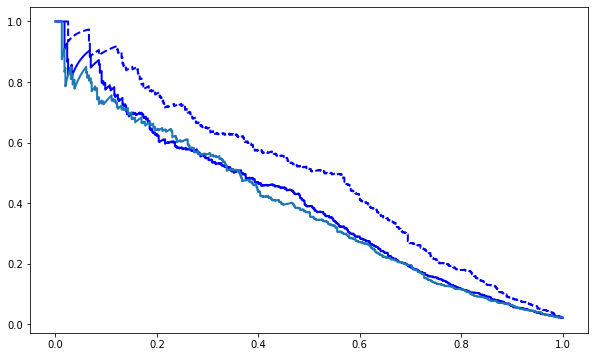

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import random
import os
import argparse
from sklearn.metrics import precision_recall_curve


keyd="logfc_x_jsd.mean"
key_short="logfc_x_jsd"
plt.figure(figsize=(10,6))


fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(merged_atac_orig["label"].astype(int), abs(merged_atac_orig[keyd]))
roc_auc = metrics.average_precision_score(merged_atac_orig["label"], abs(merged_atac_orig[keyd]))
plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', linestyle='dashed', label="ChromBPnet w/ ATAC, AP="+str(round(roc_auc,2)))

scores.append(roc_auc)
labels.append("ATAC (572M)")
keys.append(key_short)

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(merged_atac["label"], abs(merged_atac[keyd]))
roc_auc = metrics.average_precision_score(merged_atac["label"], abs(merged_atac[keyd]))
plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', label="ChromBPnet effect sizes w/ ATAC, AP="+str(round(roc_auc,2)))

scores.append(roc_auc)
labels.append("ATAC (50M)")
keys.append(key_short)

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(merged_dnase["label"], abs(merged_dnase[keyd]))
roc_auc = metrics.average_precision_score(merged_dnase["label"], abs(merged_dnase[keyd]))
plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label="ChromBPnet effect sizes w/ DNASE , AP="+str(round(roc_auc,2)))

scores.append(roc_auc)
labels.append("DNASE (68M)")
keys.append(key_short)


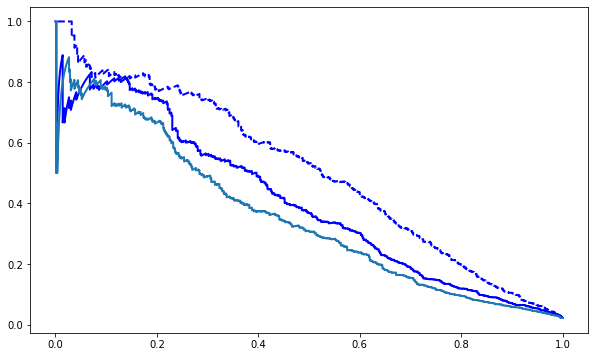

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import random
import os
import argparse
from sklearn.metrics import precision_recall_curve


keyd="jsd_x_max_percentile.mean"
key_short="jsd_x_max_percentile"
plt.figure(figsize=(10,6))



fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(merged_atac_orig["label"].astype(int), abs(merged_atac_orig[keyd]))
roc_auc = metrics.average_precision_score(merged_atac_orig["label"], abs(merged_atac_orig[keyd]))
plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', linestyle='dashed', label="ChromBPnet w/ ATAC, AP="+str(round(roc_auc,2)))

scores.append(roc_auc)
labels.append("ATAC (572M)")
keys.append(key_short)

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(merged_atac["label"], abs(merged_atac[keyd]))
roc_auc = metrics.average_precision_score(merged_atac["label"], abs(merged_atac[keyd]))
plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', label="ChromBPnet effect sizes w/ ATAC, AP="+str(round(roc_auc,2)))

scores.append(roc_auc)
labels.append("ATAC (50M)")
keys.append(key_short)

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(merged_dnase["label"], abs(merged_dnase[keyd]))
roc_auc = metrics.average_precision_score(merged_dnase["label"], abs(merged_dnase[keyd]))
plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label="ChromBPnet effect sizes w/ DNASE , AP="+str(round(roc_auc,2)))

scores.append(roc_auc)
labels.append("DNASE (68M)")
keys.append(key_short)



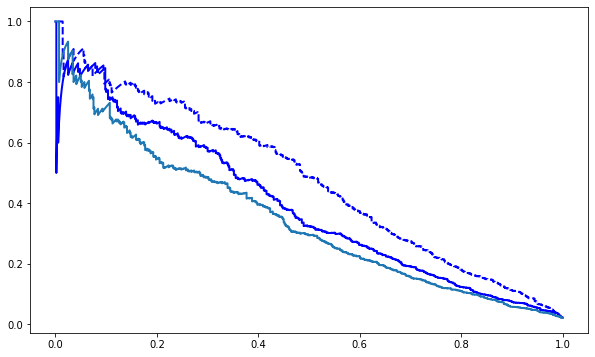

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import random
import os
import argparse
from sklearn.metrics import precision_recall_curve


#abs_logfc_x_jsd_x_max_percentile.mean

keyd="abs_logfc_x_max_percentile.mean"
key_short="logfc_x_max_percentile"
plt.figure(figsize=(10,6))



fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(merged_atac_orig["label"].astype(int), abs(merged_atac_orig[keyd]))
roc_auc = metrics.average_precision_score(merged_atac_orig["label"], abs(merged_atac_orig[keyd]))
plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', linestyle='dashed', label="ChromBPnet w/ ATAC, AP="+str(round(roc_auc,2)))

scores.append(roc_auc)
labels.append("ATAC (572M)")
keys.append(key_short)

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(merged_atac["label"], abs(merged_atac[keyd]))
roc_auc = metrics.average_precision_score(merged_atac["label"], abs(merged_atac[keyd]))
plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', label="ChromBPnet effect sizes w/ ATAC, AP="+str(round(roc_auc,2)))

scores.append(roc_auc)
labels.append("ATAC (50M)")
keys.append(key_short)

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(merged_dnase["label"], abs(merged_dnase[keyd]))
roc_auc = metrics.average_precision_score(merged_dnase["label"], abs(merged_dnase[keyd]))
plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label="ChromBPnet effect sizes w/ DNASE , AP="+str(round(roc_auc,2)))

scores.append(roc_auc)
labels.append("DNASE (68M)")
keys.append(key_short)



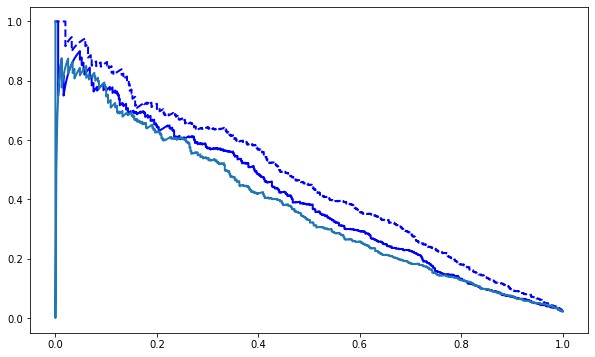

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import random
import os
import argparse
from sklearn.metrics import precision_recall_curve


#abs_logfc_x_jsd_x_max_percentile.mean

keyd="jsd.mean"
key_short="jsd"
plt.figure(figsize=(10,6))



fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(merged_atac_orig["label"].astype(int), abs(merged_atac_orig[keyd]))
roc_auc = metrics.average_precision_score(merged_atac_orig["label"], abs(merged_atac_orig[keyd]))
plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', linestyle='dashed', label="ChromBPnet w/ ATAC, AP="+str(round(roc_auc,2)))

scores.append(roc_auc)
labels.append("ATAC (572M)")
keys.append(key_short)

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(merged_atac["label"], abs(merged_atac[keyd]))
roc_auc = metrics.average_precision_score(merged_atac["label"], abs(merged_atac[keyd]))
plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', label="ChromBPnet effect sizes w/ ATAC, AP="+str(round(roc_auc,2)))

scores.append(roc_auc)
labels.append("ATAC (50M)")
keys.append(key_short)

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(merged_dnase["label"], abs(merged_dnase[keyd]))
roc_auc = metrics.average_precision_score(merged_dnase["label"], abs(merged_dnase[keyd]))
plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label="ChromBPnet effect sizes w/ DNASE , AP="+str(round(roc_auc,2)))

scores.append(roc_auc)
labels.append("DNASE (68M)")
keys.append(key_short)



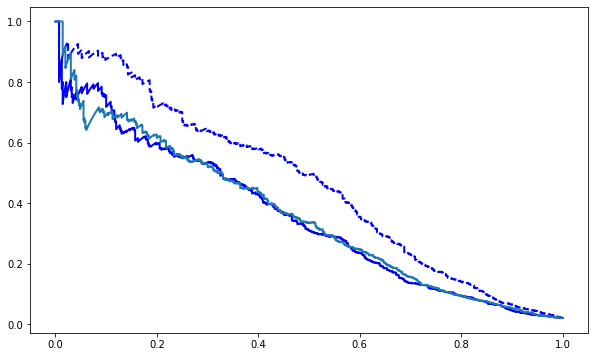

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import random
import os
import argparse
from sklearn.metrics import precision_recall_curve


keyd="logfc.mean"
key_short="logfc"
plt.figure(figsize=(10,6))



fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(merged_atac_orig["label"].astype(int), abs(merged_atac_orig[keyd]))
roc_auc = metrics.average_precision_score(merged_atac_orig["label"], abs(merged_atac_orig[keyd]))
plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', linestyle='dashed', label="ChromBPnet w/ ATAC, AP="+str(round(roc_auc,2)))

scores.append(roc_auc)
labels.append("ATAC (572M)")
keys.append(key_short)

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(merged_atac["label"], abs(merged_atac[keyd]))
roc_auc = metrics.average_precision_score(merged_atac["label"], abs(merged_atac[keyd]))
plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', label="ChromBPnet effect sizes w/ ATAC, AP="+str(round(roc_auc,2)))

scores.append(roc_auc)
labels.append("ATAC (50M)")
keys.append(key_short)

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(merged_dnase["label"], abs(merged_dnase[keyd]))
roc_auc = metrics.average_precision_score(merged_dnase["label"], abs(merged_dnase[keyd]))
plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label="ChromBPnet effect sizes w/ DNASE , AP="+str(round(roc_auc,2)))

scores.append(roc_auc)
labels.append("DNASE (68M)")
keys.append(key_short)



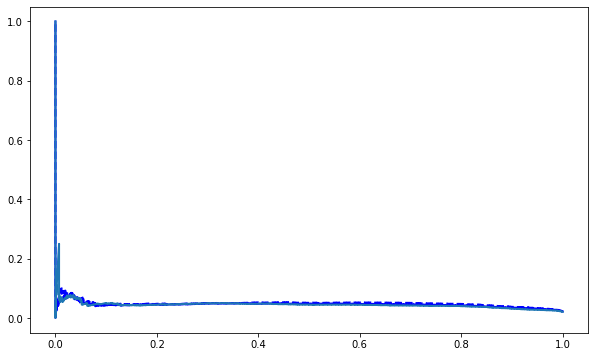

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import random
import os
import argparse
from sklearn.metrics import precision_recall_curve


#max_percentile.mean

keyd="max_percentile.mean"
key_short="max_percentile"
plt.figure(figsize=(10,6))



fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(merged_atac_orig["label"].astype(int), abs(merged_atac_orig[keyd]))
roc_auc = metrics.average_precision_score(merged_atac_orig["label"], abs(merged_atac_orig[keyd]))
plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', linestyle='dashed', label="ChromBPnet w/ ATAC, AP="+str(round(roc_auc,2)))

scores.append(roc_auc)
labels.append("ATAC (572M)")
keys.append(key_short)

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(merged_atac["label"], abs(merged_atac[keyd]))
roc_auc = metrics.average_precision_score(merged_atac["label"], abs(merged_atac[keyd]))
plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', label="ChromBPnet effect sizes w/ ATAC, AP="+str(round(roc_auc,2)))

scores.append(roc_auc)
labels.append("ATAC (50M)")
keys.append(key_short)

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(merged_dnase["label"], abs(merged_dnase[keyd]))
roc_auc = metrics.average_precision_score(merged_dnase["label"], abs(merged_dnase[keyd]))
plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label="ChromBPnet effect sizes w/ DNASE , AP="+str(round(roc_auc,2)))

scores.append(roc_auc)
labels.append("DNASE (68M)")
keys.append(key_short)



In [35]:
import seaborn as sns

In [36]:
dictt={"scores":scores, "labels":labels, "method":keys}

In [37]:
df = pd.DataFrame(dictt)

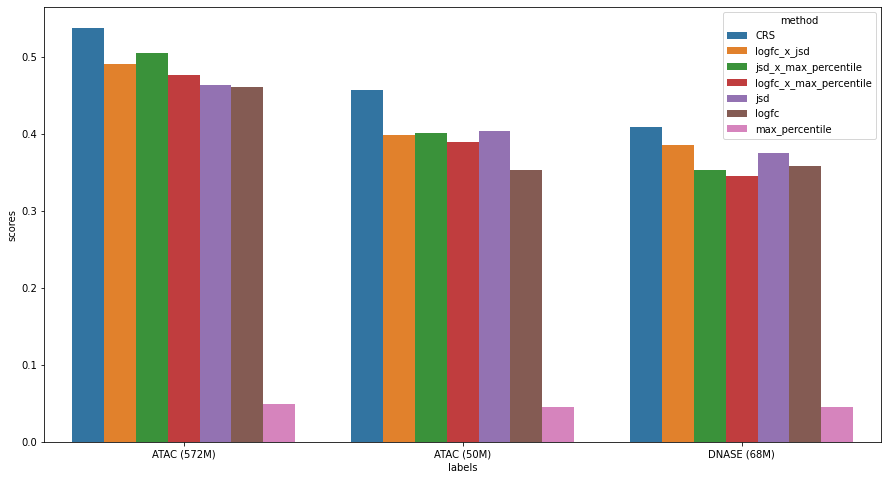

In [38]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

plt.figure(figsize=(15,8))

sns.barplot(data=df, x="labels", y="scores", hue="method")

plt.savefig("subfigs_new/compare_scores.pdf", transparent=True, dpi=300)

In [39]:
len(set(merged_atac["rsid"]))

27373

In [40]:
merged_atac["rsid"].shape

(27373,)

In [41]:
compare = merged_enf.merge(merged_dnase, left_on=["rsid_x"], right_on=["SNPname2"])

In [42]:
compare.shape

(27373, 67)

In [43]:
compare.columns

Index(['chr_x', 'pos_x', 'ref', 'alt', 'rsid_x', 'DNASE_SAD', 'DNASE_SAR',
       'chrom_hg18_x', 'pos_hg18_x', 'SNPname1_x', 'chrom_hg19_x',
       'pos_hg19_x', 'SNPname2_x', 'allele1', 'allele2', 'gkm_SVM_x',
       'kmer_SVM_x', 'abs_gkm_SVM_x', 'abs_kmer_SVM_x', 'CADD_x',
       'GWAVA_region_x', 'GWAVA_tss_x', 'GWAVA_unmatched_x', 'GERP_x',
       'label_x', 'rsid_y', 'chr_y', 'pos_y', 'allele1_x', 'allele2_x', 'rsid',
       'logfc.mean', 'abs_logfc.mean', 'abs_logfc.mean.pval', 'jsd.mean',
       'jsd.mean.pval', 'logfc_x_jsd.mean', 'abs_logfc_x_jsd.mean',
       'abs_logfc_x_jsd.mean.pval', 'max_percentile.mean',
       'max_percentile.mean.pval', 'logfc_x_max_percentile.mean',
       'abs_logfc_x_max_percentile.mean',
       'abs_logfc_x_max_percentile.mean.pval', 'jsd_x_max_percentile.mean',
       'jsd_x_max_percentile.mean.pval',
       'abs_logfc_x_jsd_x_max_percentile.mean',
       'abs_logfc_x_jsd_x_max_percentile.mean.pval',
       'logfc_x_jsd_x_max_percentile.mean', 

In [44]:
compare["sign_jsd"] = compare['jsd.mean']*np.sign(compare['logfc.mean'])
compare["abss_logfc_x_max_percentile.mean"] = np.abs(compare["logfc_x_max_percentile.mean"])

In [78]:
chrombpnet_vals=[]
enformer_vals=[]
enformer_sar_vals=[]
dirs_rev=[]
dirs_fwd=[]

for i, r in compare.iterrows():
    
    chrombpnet_vals.append(abs(r["abs_logfc_x_jsd_x_max_percentile.mean"]))
    enformer_vals.append(np.abs(r["DNASE_SAD"]))
    enformer_sar_vals.append(np.abs(r["DNASE_SAR"]))
#     if (r['ref']==r['allele1']) and (r['alt']==r['allele2']):
#         #chrombpnet_vals.append(r["sign_jsd"])
#         chrombpnet_vals.append(r["abs_logfc_x_jsd_x_max_percentile.mean"]*np.sign(r["logfc.mean"]))

#         enformer_vals.append(r["DNASE_SAD"])
#         enformer_sar_vals.append(r["DNASE_SAR"])
#         dirs_fwd.append(True)
#     elif (r['ref']==r['allele2']) and (r['alt']==r['allele1']):
#         #chrombpnet_vals.append(r["sign_jsd"])
#         chrombpnet_vals.append(r["abs_logfc_x_jsd_x_max_percentile.mean"]*np.sign(r["logfc.mean"]))

#         enformer_vals.append(r["DNASE_SAD"]*-1)
#         enformer_sar_vals.append(r["DNASE_SAR"]*-1)
#         dirs_rev.append(True)
#     else:
#         print(r['ref'],r['allele2'],r['alt'],r['allele1'])
    

In [79]:
print(len(dirs_rev))

0


In [80]:
print(len(dirs_fwd))

0


In [81]:
compare["chrom_scores"] = chrombpnet_vals
compare["enf_sad_scores"] = enformer_vals
compare["enf_sar_scores"] = enformer_sar_vals


0.004830919999999954
0.02560529604150634


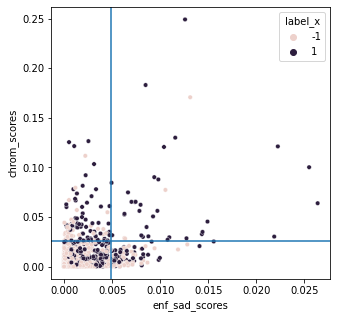

In [82]:
import seaborn as sns
plt.figure(figsize=(5,5))

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 


sns.scatterplot(data=compare, y="chrom_scores", x="enf_sad_scores", hue="label_x", s=20)
plt.axvline(np.quantile(compare["enf_sad_scores"],0.995))
plt.axhline(np.quantile(compare["chrom_scores"],0.995))
print(np.quantile(compare["enf_sad_scores"],0.995))
print(np.quantile(compare["chrom_scores"],0.995))

plt.savefig("subfigs_new/compare_scores.pdf", transparent=True, dpi=300)

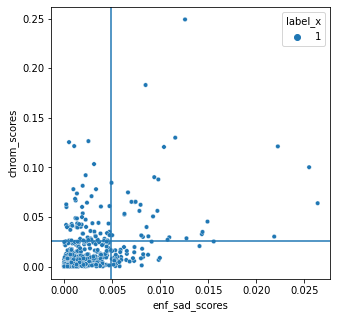

In [83]:
import seaborn as sns
plt.figure(figsize=(5,5))

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

compare_new = compare[compare["label_x"]==1]

sns.scatterplot(data=compare_new, y="chrom_scores", x="enf_sad_scores", hue="label_x", s=20)
plt.axvline(0.004830919999999954)
plt.axhline(0.025605295932057567)

#plt.savefig("subfigs_new/compare_scores.pdf", transparent=True, dpi=300)

In [88]:
compare_new[(compare_new["chrom_scores"]>0.12) & (compare_new["DNASE_SAD"]<0.005)]

,chr_x,pos_x,ref,alt,rsid_x,DNASE_SAD,DNASE_SAR,chrom_hg18_x,pos_hg18_x,SNPname1_x,...,GWAVA_region_y,GWAVA_tss_y,GWAVA_unmatched_y,GERP_y,label_y,sign_jsd,abss_logfc_x_max_percentile.mean,chrom_scores,enf_sad_scores,enf_sar_scores
13073,chr2,133340261,A,G,rs73955703,0.000519,0.000715,chr2,133056731,chr2.133056731,...,0.33,0.27,0.20,2.610,1,-0.285406,0.433505,0.125499,0.000519,0.000715
16595,chr3,119999621,G,T,rs787202,0.001058,0.001453,chr3,121482311,chr3.121482311,...,0.29,0.40,0.45,-0.318,1,-0.165655,0.730231,0.121519,0.001058,0.001453
22975,chr9,135991219,A,G,rs74734156,-0.022230,-0.026170,chr9,134981040,chr9.134981040,...,0.44,0.40,0.59,-5.600,1,0.134334,0.832848,0.121210,0.022230,0.026170
25585,chr2,45517342,T,C,rs4953223,0.002533,0.003458,chr2,45370846,chr2.45370846,...,0.37,0.41,0.38,0.984,1,0.175825,0.660938,0.126536,0.002533,0.003458


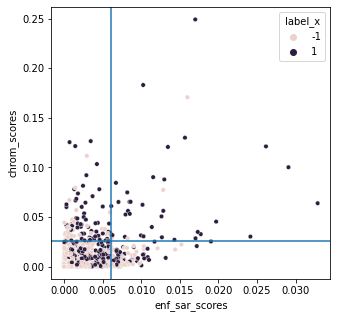

In [50]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.scatterplot(data=compare, y="chrom_scores", x="enf_sar_scores", hue="label_x", s=20)
plt.axvline(np.quantile(compare["enf_sar_scores"],0.995))
plt.axhline(np.quantile(compare["chrom_scores"],0.995))

In [51]:
compare[compare["rsid_x"]=="rs7094325"]

,chr_x,pos_x,ref,alt,rsid_x,DNASE_SAD,DNASE_SAR,chrom_hg18_x,pos_hg18_x,SNPname1_x,...,GWAVA_region_y,GWAVA_tss_y,GWAVA_unmatched_y,GERP_y,label_y,sign_jsd,abss_logfc_x_max_percentile.mean,chrom_scores,enf_sad_scores,enf_sar_scores
2649,chr10,104429746,G,C,rs7094325,-0.000357,-0.000397,chr10,104419736,chr10.104419736,...,0.51,0.54,0.53,3.56,1,0.223014,0.035687,0.008097,0.000357,0.000397


In [52]:
pbs = (compare["chrom_scores"]>0.05) & (compare["enf_sad_scores"]<0.005) & (compare["label_x"]==-1)
sum(pbs)

5

In [53]:
pbs = (compare["chrom_scores"]<0.05) & (compare["enf_sad_scores"]>0.005)  & (compare["label_x"]==-1)
sum(pbs)

59

In [54]:
#chrombpnet_atac

In [57]:
merged_enf.shape

(27373, 26)

In [58]:
merged_atac.shape

(27373, 41)